<a href="https://colab.research.google.com/github/DeenoBajithaCode/LangGraph/blob/main/langgraph_chatbots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing LangGraph

This command installs the `langgraph` library, which allows us to build and simulate graph-based workflows in Python.


In [2]:
!pip install langchain==0.3.24 -q
!pip install langchain-openai -q
!pip install langgraph -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.7 MB/s eta 0:00:00


### Chat Agent


In [18]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

##Step 1: Define State

In [19]:
class ChatState(TypedDict):
    messages: List[HumanMessage]

In [20]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = "*****"

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0
)

##Step 2: Create Chatbot Node

In [21]:
def chatbot(state: ChatState) -> ChatState:
    response = llm.invoke(state["messages"])
    # state["messages"].append(AIMessage(content=response.content))
    print(f"\nAI: {response.content}")
    return state

##Step 3: Build the graph

In [22]:
workflow = StateGraph(ChatState)

workflow.add_node("chatbot", chatbot)

workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)

app = workflow.compile()

# Step 4: Visualize the graph

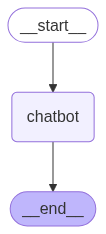

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

#Simple query execution

In [24]:
user_input = input("Enter a Query: ")
result = app.invoke({"messages": [HumanMessage(content=user_input)]})

Enter a Query: Hello Iam Bajitha

AI: Hello Bajitha! How can I assist you today?


##Simple CHat Execution

In [25]:
user_input = input("Enter a Query: ")
while user_input != "bye":
    result = app.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter a Query: ")

Enter a Query: Hello I am Bajitha

AI: Hello Bajitha! How can I assist you today?
Enter a Query: Who Am I ?

AI: You are a unique individual with your own thoughts, experiences, and identity. If you're looking for a more specific answer, feel free to share more details or context!
Enter a Query: bye


##Conversational Chat Agent

In [26]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage

##Step 1: Define State

In [27]:
class ChatState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

In [28]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = "*****"

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0
)

##Step 2: Visualize the graph

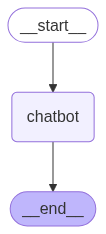

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

##Simple query execution

In [30]:
user_input = input("Enter a Query: ")
result = app.invoke({"messages": [HumanMessage(content=user_input)]})

Enter a Query: Hello I am Bajitha

AI: Hello Bajitha! How can I assist you today?


## Historical Conversation Execution

In [31]:
conversation_history = []
user_input = input("Enter a Query: ")
while user_input != "bye":
    conversation_history.append(HumanMessage(content=user_input))
    result = app.invoke({"messages": conversation_history})
    conversation_history = result["messages"]
    user_input = input("Enter a Query: ")

Enter a Query: Hello I am Bajitha

AI: Hello Bajitha! How can I assist you today?
Enter a Query: Who Am I?

AI: Hello Bajitha! You are the person best equipped to answer that question, as it involves your personal identity, experiences, and self-perception. If you're asking in a more philosophical or existential sense, it could be a reflection on your values, beliefs, and purpose. If you have specific aspects of your identity or life that you'd like to explore or discuss, feel free to share!
Enter a Query: bye
